In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sidetable as stb
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

plt.rcParams["figure.figsize"] = (40,40)

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Pair Programming Intro Machine Learning

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [3]:
df = pd.read_csv("../archivos/cost-of-living_v2.csv")
df.shape

(4956, 58)

In [4]:
df.stb.missing().T

,x40,x53,x52,x29,x43,x51,x28,x50,x54,x49,x32,x39,x48,x37,x42,x34,x31,x55,x35,x30,x25,x26,x45,x33,x15,x14,x47,x12,x46,x22,x4,x27,x36,x44,x13,x41,x19,x24,x2,x7,x18,x5,x20,x21,x1,x10,x23,x17,x9,x16,x38,x6,x11,x3,x8,city,country,data_quality
missing,2400.00000,2303.000000,2227.000000,2166.0000,1681.000000,1512.000000,1506.000000,1480.000000,1432.00000,1431.000000,1396.000000,1375.000000,1363.000000,1201.000000,1132.000000,1058.000000,1022.000000,1006.000000,995.000000,873.000000,721.000000,655.000000,617.000000,588.000000,566.0000,558.00000,553.000000,507.000000,503.000000,501.000000,496.000000,490.000000,488.000000,479.000000,478.000000,475.000000,469.000000,462.000000,451.000000,445.000000,441.000000,440.000000,437.000000,433.000000,428.000000,413.000000,388.000000,381.000000,378.000000,372.000000,349.000000,344.000000,343.000000,334.000000,316.00000,0.0,0.0,0.0
total,4956.00000,4956.000000,4956.000000,4956.0000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.0000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.0,4956.0,4956.0
percent,48.42615,46.468927,44.935432,43.7046,33.918483,30.508475,30.387409,29.862793,28.89427,28.874092,28.167877,27.744149,27.502018,24.233253,22.841001,21.347861,20.621469,20.298628,20.076675,17.615012,14.548023,13.216303,12.449556,11.864407,11.4205,11.25908,11.158192,10.230024,10.149314,10.108959,10.008071,9.887006,9.846651,9.665052,9.644875,9.584342,9.463277,9.322034,9.100081,8.979015,8.898305,8.878128,8.817595,8.736885,8.635997,8.333333,7.828894,7.687651,7.627119,7.506053,7.041969,6.941082,6.920904,6.739306,6.37611,0.0,0.0,0.0


In [5]:
df.sample(5)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
2696,Burton upon Trent,United Kingdom,23.37,43.05,7.38,3.94,4.92,2.95,1.35,0.98,1.22,1.23,2.46,2.49,NaN,6.15,7.38,1.23,1.23,1.23,1.23,0.98,0.74,0.74,1.60,7.38,3.08,2.21,12.61,2.46,NaN,3.69,1.23,17.71,1.90,14760.00,19680.0,NaN,0.37,36.90,43.05,NaN,7.38,738.00,8610.00,73.80,49.20,61.50,61.50,NaN,NaN,NaN,NaN,NaN,NaN,1874.30,3.26,0
3650,Harlow,United Kingdom,18.45,67.65,6.46,3.69,5.54,3.32,1.56,1.37,1.13,1.00,1.48,2.15,5.80,6.15,12.92,2.43,0.90,2.56,2.57,0.57,1.02,0.53,0.62,8.61,1.44,1.41,13.87,3.38,69.52,3.57,1.75,29.52,1.89,19926.00,21525.0,103.32,0.43,38.54,38.54,NaN,12.30,922.50,9594.00,58.43,24.60,36.90,49.20,1060.88,953.25,1629.75,1476.00,NaN,NaN,3136.50,1.50,0
4808,Aigle,Switzerland,37.40,85.48,19.23,8.55,7.48,4.81,4.27,3.74,1.71,3.21,4.27,7.69,21.37,26.71,64.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.37,NaN,NaN,NaN,3.74,NaN,NaN,NaN,NaN,1.82,NaN,NaN,NaN,NaN,85.48,NaN,NaN,NaN,1282.14,NaN,NaN,NaN,106.85,NaN,747.92,747.92,1923.21,NaN,27107.76,NaN,NaN,NaN,0
555,Andorra la Vella,Andorra,14.23,52.69,8.43,2.11,3.16,1.77,1.92,1.42,0.95,1.05,2.11,2.53,21.07,10.54,8.43,1.84,1.84,1.84,3.16,1.05,1.58,1.05,0.76,8.43,1.05,1.48,5.01,2.00,31.61,2.79,1.22,5.27,1.39,18967.41,NaN,76.19,0.37,40.39,46.89,11.59,6.32,551.46,8640.71,68.49,28.98,98.35,105.37,784.48,645.42,1536.71,1106.43,4425.73,3371.98,2509.67,2.50,0
2673,Lawrence,United States,12.00,60.00,8.00,4.50,6.00,4.84,2.16,1.80,0.84,2.12,4.33,1.69,12.86,15.75,13.49,4.90,1.81,4.89,3.43,1.54,2.23,1.39,1.68,12.00,1.43,2.77,7.24,1.00,34.00,2.50,1.55,35.00,1.06,20000.00,22000.0,235.15,0.08,66.66,NaN,NaN,12.00,950.00,9933.33,57.86,40.29,75.00,75.00,933.33,616.67,1780.00,1050.00,5672.58,1614.59,2936.00,5.43,0


In [6]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")    
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")

In [7]:
eda = exploracion(df)

.............................................
En el dataframe hay 4956 filas y 58 columnas.
.............................................
5 filas aleatorias:


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
4256,Bugojno,Bosnia And Herzegovina,4.03,14.24,3.23,1.61,1.88,1.21,1.48,0.94,0.87,0.98,1.09,1.91,6.58,5.38,9.68,1.01,1.48,1.45,1.05,0.71,1.25,0.54,0.54,3.23,0.87,1.02,3.23,NaN,NaN,0.81,0.70,8.06,1.59,26608.31,23651.83,143.34,0.11,23.29,16.13,NaN,2.69,147.82,5160.40,37.63,13.44,53.75,48.38,NaN,NaN,NaN,NaN,NaN,NaN,376.28,7.00,0
2931,Lamia,Greece,10.54,34.25,5.80,3.42,4.21,2.63,2.11,0.53,1.38,1.00,2.63,3.90,7.02,8.08,10.47,1.84,2.32,1.58,2.07,1.37,1.58,1.05,1.32,7.38,1.72,3.16,5.27,1.26,22.13,3.69,0.78,12.64,2.32,22128.65,17386.80,247.63,0.37,43.47,40.83,NaN,8.43,288.02,7903.09,75.52,35.12,79.03,117.67,273.97,214.26,403.94,421.50,1053.75,1369.87,773.62,3.35,0
3525,Sangre Grande,Trinidad And Tobago,7.37,44.24,4.79,1.47,2.95,3.02,0.96,0.74,1.92,1.96,4.06,3.36,5.90,4.42,8.85,2.95,1.38,1.55,2.21,1.95,1.48,1.47,1.18,23.60,1.97,2.65,4.42,1.84,128.24,0.88,0.81,NaN,0.85,49773.51,33735.38,25.81,0.10,50.85,33.18,14.75,7.37,113.07,1966.36,58.99,44.24,86.03,73.74,265.46,272.83,589.91,442.43,NaN,NaN,553.04,5.17,0
1196,Bari,Italy,15.81,52.69,8.43,3.69,3.16,1.35,1.50,0.84,1.13,1.52,2.07,3.21,12.84,10.54,17.91,1.74,1.72,1.45,1.88,1.26,1.33,1.17,0.80,5.27,1.57,1.32,6.32,1.05,40.04,5.80,0.84,26.24,2.28,30558.61,NaN,176.18,0.21,31.14,47.42,16.86,8.17,316.12,17386.80,68.49,43.34,91.54,124.94,779.77,513.70,1765.02,816.65,4285.23,2669.49,1490.30,2.69,1
1246,Yakutsk,Russia,11.20,32.00,8.00,3.36,5.44,2.88,1.15,0.70,1.66,0.88,1.91,2.32,14.87,5.58,9.47,4.49,3.45,4.17,4.33,1.58,1.88,1.93,1.33,8.47,1.71,2.76,2.40,0.56,19.20,2.80,0.80,9.60,0.89,NaN,NaN,170.06,NaN,16.18,74.00,6.40,5.60,176.00,NaN,60.00,40.00,72.00,96.00,592.00,400.00,1034.67,656.00,2186.67,1600.00,986.67,8.75,0


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,city,object
1,country,object
2,x1,float64
3,x2,float64
4,x3,float64
5,x4,float64
6,x5,float64
7,x6,float64
8,x7,float64
9,x8,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,city,0
1,country,0
2,x1,428
3,x2,451
4,x3,334
5,x4,496
6,x5,440
7,x6,344
8,x7,445
9,x8,316


.............................................
El porcentaje de nulos por columna del dataframe son:


city             0.000000
country          0.000000
x1               8.635997
x2               9.100081
x3               6.739306
x4              10.008071
x5               8.878128
x6               6.941082
x7               8.979015
x8               6.376110
x9               7.627119
x10              8.333333
x11              6.920904
x12             10.230024
x13              9.644875
x14             11.259080
x15             11.420500
x16              7.506053
x17              7.687651
x18              8.898305
x19              9.463277
x20              8.817595
x21              8.736885
x22             10.108959
x23              7.828894
x24              9.322034
x25             14.548023
x26             13.216303
x27              9.887006
x28             30.387409
x29             43.704600
x30             17.615012
x31             20.621469
x32             28.167877
x33             11.864407
x34             21.347861
x35             20.076675
x36              9.846651
x37         

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,4613.00000,4449.000000,4478.000000,4398.000000,4390.000000,4584.000000,4575.000000,4515.000000,4487.000000,4519.000000,4523.000000,4455.000000,4568.000000,4494.000000,4235.000000,4301.000000,4466.000000,3450.000000,2790.000000,4083.000000,3934.000000,3560.000000,4368.000000,3898.000000,3961.000000,4468.000000,3755.000000,4607.000000,3581.000000,2556.000000,4481.000000,3824.000000,3275.000000,4477.000000,4339.000000,4453.000000,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,1.148554,1.612855,2.18726,2.352544,9.498341,7.169729,11.722251,2.749391,1.554691,2.361697,2.559650,1.566477,1.522472,1.227113,0.986806,8.642628,1.658430,2.310500,6.285253,1.517145,43.981717,2.765378,1.231490,17.175180,1.361664,23781.480667,23878.492083,136.254584,0.136008,146.323369,36.849994,15.780137,8.366133,489.580267,8770.865915,52.617391,35.039650,76.998309,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,0.517186,1.089164,1.63280,1.078669,4.930385,4.450099,7.284523,1.877756,0.831027,1.697792,1.810338,1.227042,1.123391,0.733580,0.678959,4.646069,0.912728,1.196492,4.446120,1.327994,36.867305,2.230275,0.853241,15.666538,0.495643,9057.962571,8770.285094,85.048918,0.123784,7159.592660,22.929434,11.157743,4.132562,515.000774,8030.169251,25.267695,15.173614,33.252260,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,0.25000,0.100000,0.900000,1.220000,1.470000,0.270000,0.220000,0.200000,0.120000,0.110000,0.110000,0.080000,0.110000,0.360000,0.250000,0.360000,0.450000,0.000000,0.000000,0.140000,0.090000,0.160000,0.030000,0.000000,3212.850000,6.070000,0.000000,1.360000,0.000000,0.000000,0.680000,4.070000,0.000000,4.070000,0.000000,8.030000,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,0.830000,0.780000,1.05000,1.570000,6.150000,4.012500,7.240000,1.460000,1.100000,1.210000,1.190000,0.740000,0.740000,0.710000,0.490000,5.270000,0.990000,1.490000,3.050000,0.480000,18.030000,1.080000,0.530000,4.790000,1.080000,18595.955000,19365.840000,68.780000,0.050000,18.830000,22.540000,8.000000,4.810000,136.622500,3161.240000,35.000000,26.340000,61.900000,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,1.045000,1.320000,1.69000,2.140000,8.800000,6.140000,10.250000,2.270000,1.420000,1.890000,2.140000,1.210000,1.170000,1.050000,0.760000,7.805000,1.430000,2.110000,5.270000,1.160000,35.000000,2.500000,1.130000,12.640000,1.280000,22920.730000,22537.500000,128.085000,0.100000,34.440000,33.180000,13.550000,8.190000,302.950000,6324.790000,48.040000,33.130000,75.000000,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,1.320000,2.200000,2.74000,2.970000,11.837500,9.210000,14.310000,3.590000,1.820000,3.060000,3.570000,2.100000,2.110000,1.630000,1.390000,11.440000,2.140000,2.870000,8.430000,2.207500,60.517500,3.690000,1.710000,25.577500,1.710000,26821.052500,26944.410000,185.000000,0.190000,57.950000,45.000000,21.070000,

.............................................
Los principales estadísticos de las columnas categóricas son:


,city,country
count,4956,4956
unique,4898,215
top,Victoria,United States
freq,4,1073


.............................................


In [9]:
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
x1,1.000000,0.787133,0.700265,0.671351,0.616461,0.632536,0.744296,0.697386,0.139099,0.622231,0.539335,0.664373,0.424392,0.665952,0.518632,0.420380,0.375257,0.515754,0.577963,0.501148,0.523620,0.532839,0.569198,0.351206,0.461349,0.329366,0.627678,0.582769,0.513656,0.532705,0.510908,0.655562,0.404555,0.187169,0.147601,0.538796,0.312701,-0.008607,0.363016,0.328329,0.709345,0.640503,0.504870,0.403080,0.253737,0.275378,0.510627,0.615323,0.658256,0.557003,0.632815,0.190151,0.271267,0.697417,-0.381823,0.053349
x2,0.787133,1.000000,0.718105,0.698378,0.642865,0.655371,0.769949,0.740840,0.222924,0.622224,0.511819,0.692471,0.452794,0.665241,0.564407,0.411911,0.391888,0.477237,0.561062,0.476485,0.494303,0.569229,0.558750,0.384850,0.468444,0.315673,0.644465,0.626361,0.556303,0.580194,0.560771,0.702710,0.446270,0.226167,0.166534,0.536971,0.316272,0.008489,0.425414,0.388261,0.753918,0.616476,0.499441,0.456375,0.289338,0.314899,0.552658,0.623417,0.651899,0.589836,0.640696,0.240004,0.337908,0.693948,-0.403753,0.125896
x3,0.700265,0.718105,1.000000,0.650093,0.584583,0.585797,0.738213,0.722785,0.227091,0.584919,0.433007,0.669963,0.465449,0.637518,0.573507,0.387318,0.386504,0.415143,0.477150,0.443456,0.452491,0.520282,0.481528,0.341213,0.403384,0.299660,0.555889,0.539219,0.461032,0.578830,0.574438,0.676028,0.456842,0.228976,0.208789,0.484908,0.300300,0.047709,0.377511,0.376072,0.684660,0.528432,0.389930,0.443769,0.300601,0.305299,0.507945,0.508011,0.533690,0.456913,0.508525,0.247241,0.322331,0.606278,-0.379621,0.076124
x4,0.671351,0.698378,0.650093,1.000000,0.816765,0.666698,0.693952,0.660362,0.164818,0.592242,0.492931,0.630149,0.390624,0.608717,0.506353,0.413725,0.338282,0.465883,0.502722,0.447513,0.471406,0.518331,0.541478,0.472192,0.582097,0.438807,0.635434,0.577139,0.531637,0.517246,0.469642,0.647089,0.405787,0.178508,0.113786,0.474442,0.252359,0.010215,0.324840,0.309552,0.699999,0.580018,0.433851,0.339847,0.196745,0.195290,0.442152,0.592668,0.626555,0.520789,0.587385,0.232883,0.315791,0.682828,-0.419605,0.091968
x5,0.616461,0.642865,0.584583,0.816765,1.000000,0.715239,0.593185,0.562202,0.182607,0.633279,0.537090,0.564701,0.355190,0.572499,0.423156,0.483926,0.313668,0.536700,0.535542,0.502842,0.519864,0.525718,0.600625,0.569759,0.644741,0.540834,0.584761,0.489884,0.454758,0.451234,0.399456,0.546740,0.232211,0.146629,0.074934,0.404926,0.224372,-0.004628,0.308803,0.261437,0.633799,0.557684,0.445348,0.187987,0.194958,0.181490,0.386164,0.607882,0.630377,0.544862,0.606742,0.234419,0.303469,0.667784,-0.327730,0.075006
x6,0.632536,0.655371,0.585797,0.666698,0.715239,1.000000,0.614581,0.620798,0.249647,0.716695,0.616368,0.614051,0.390877,0.617276,0.481039,0.588596,0.349577,0.623318,0.623217,0.583807,0.597099,0.584420,0.683022,0.569506,0.553933,0.431649,0.539153,0.528174,0.481493,0.431578,0.467810,0.557935,0.173689,0.185488,0.085602,0.450255,0.234380,0.016512,0.335491,0.308603,0.713301,0.626257,0.541684,0.191748,0.217556,0.227504,0.426496,0.645768,0.678310,0.594428,0.652725,0.209372,0.274923,0.743677,-0.320521,0.050225
x7,0.744296,0.769949,0.738213,0.693952,0.593185,0.614581,1.000000,0.864045,0.134981,0.614025,0.473940,0.704643,0.465904,0.697162,0.607103,0.369094,0.410617,0.446160,0.527416,0.449723,0.470858,0.503643,0.472422,0.258701,0.376864,0.241402,0.603832,0.620203,0.485028,0.569895,0.578052,0.718908,0.557846,0.205937,0.172258,0.609516,0.327957,0.016760,0.344313,0.338300,0.716324,0.561769,0.443360,0.511345,0.261965,0.284817,0.543205,0.546898,0.586993,0.503820,0.563916,0.221841,0.297281,0.663668,-0.462790,0.075022
x8,0.697386,0.740840,0.722785,0.660362,0.562202,0.620798,0.864045,1.000000,0.112019,0.609887,0.457919,0.667848,0.446686,0.654460,0.601488,0.386075,0.383039,0.440298,0.521573,0.458435,0.465235,0.529995,0.499978,0.27848

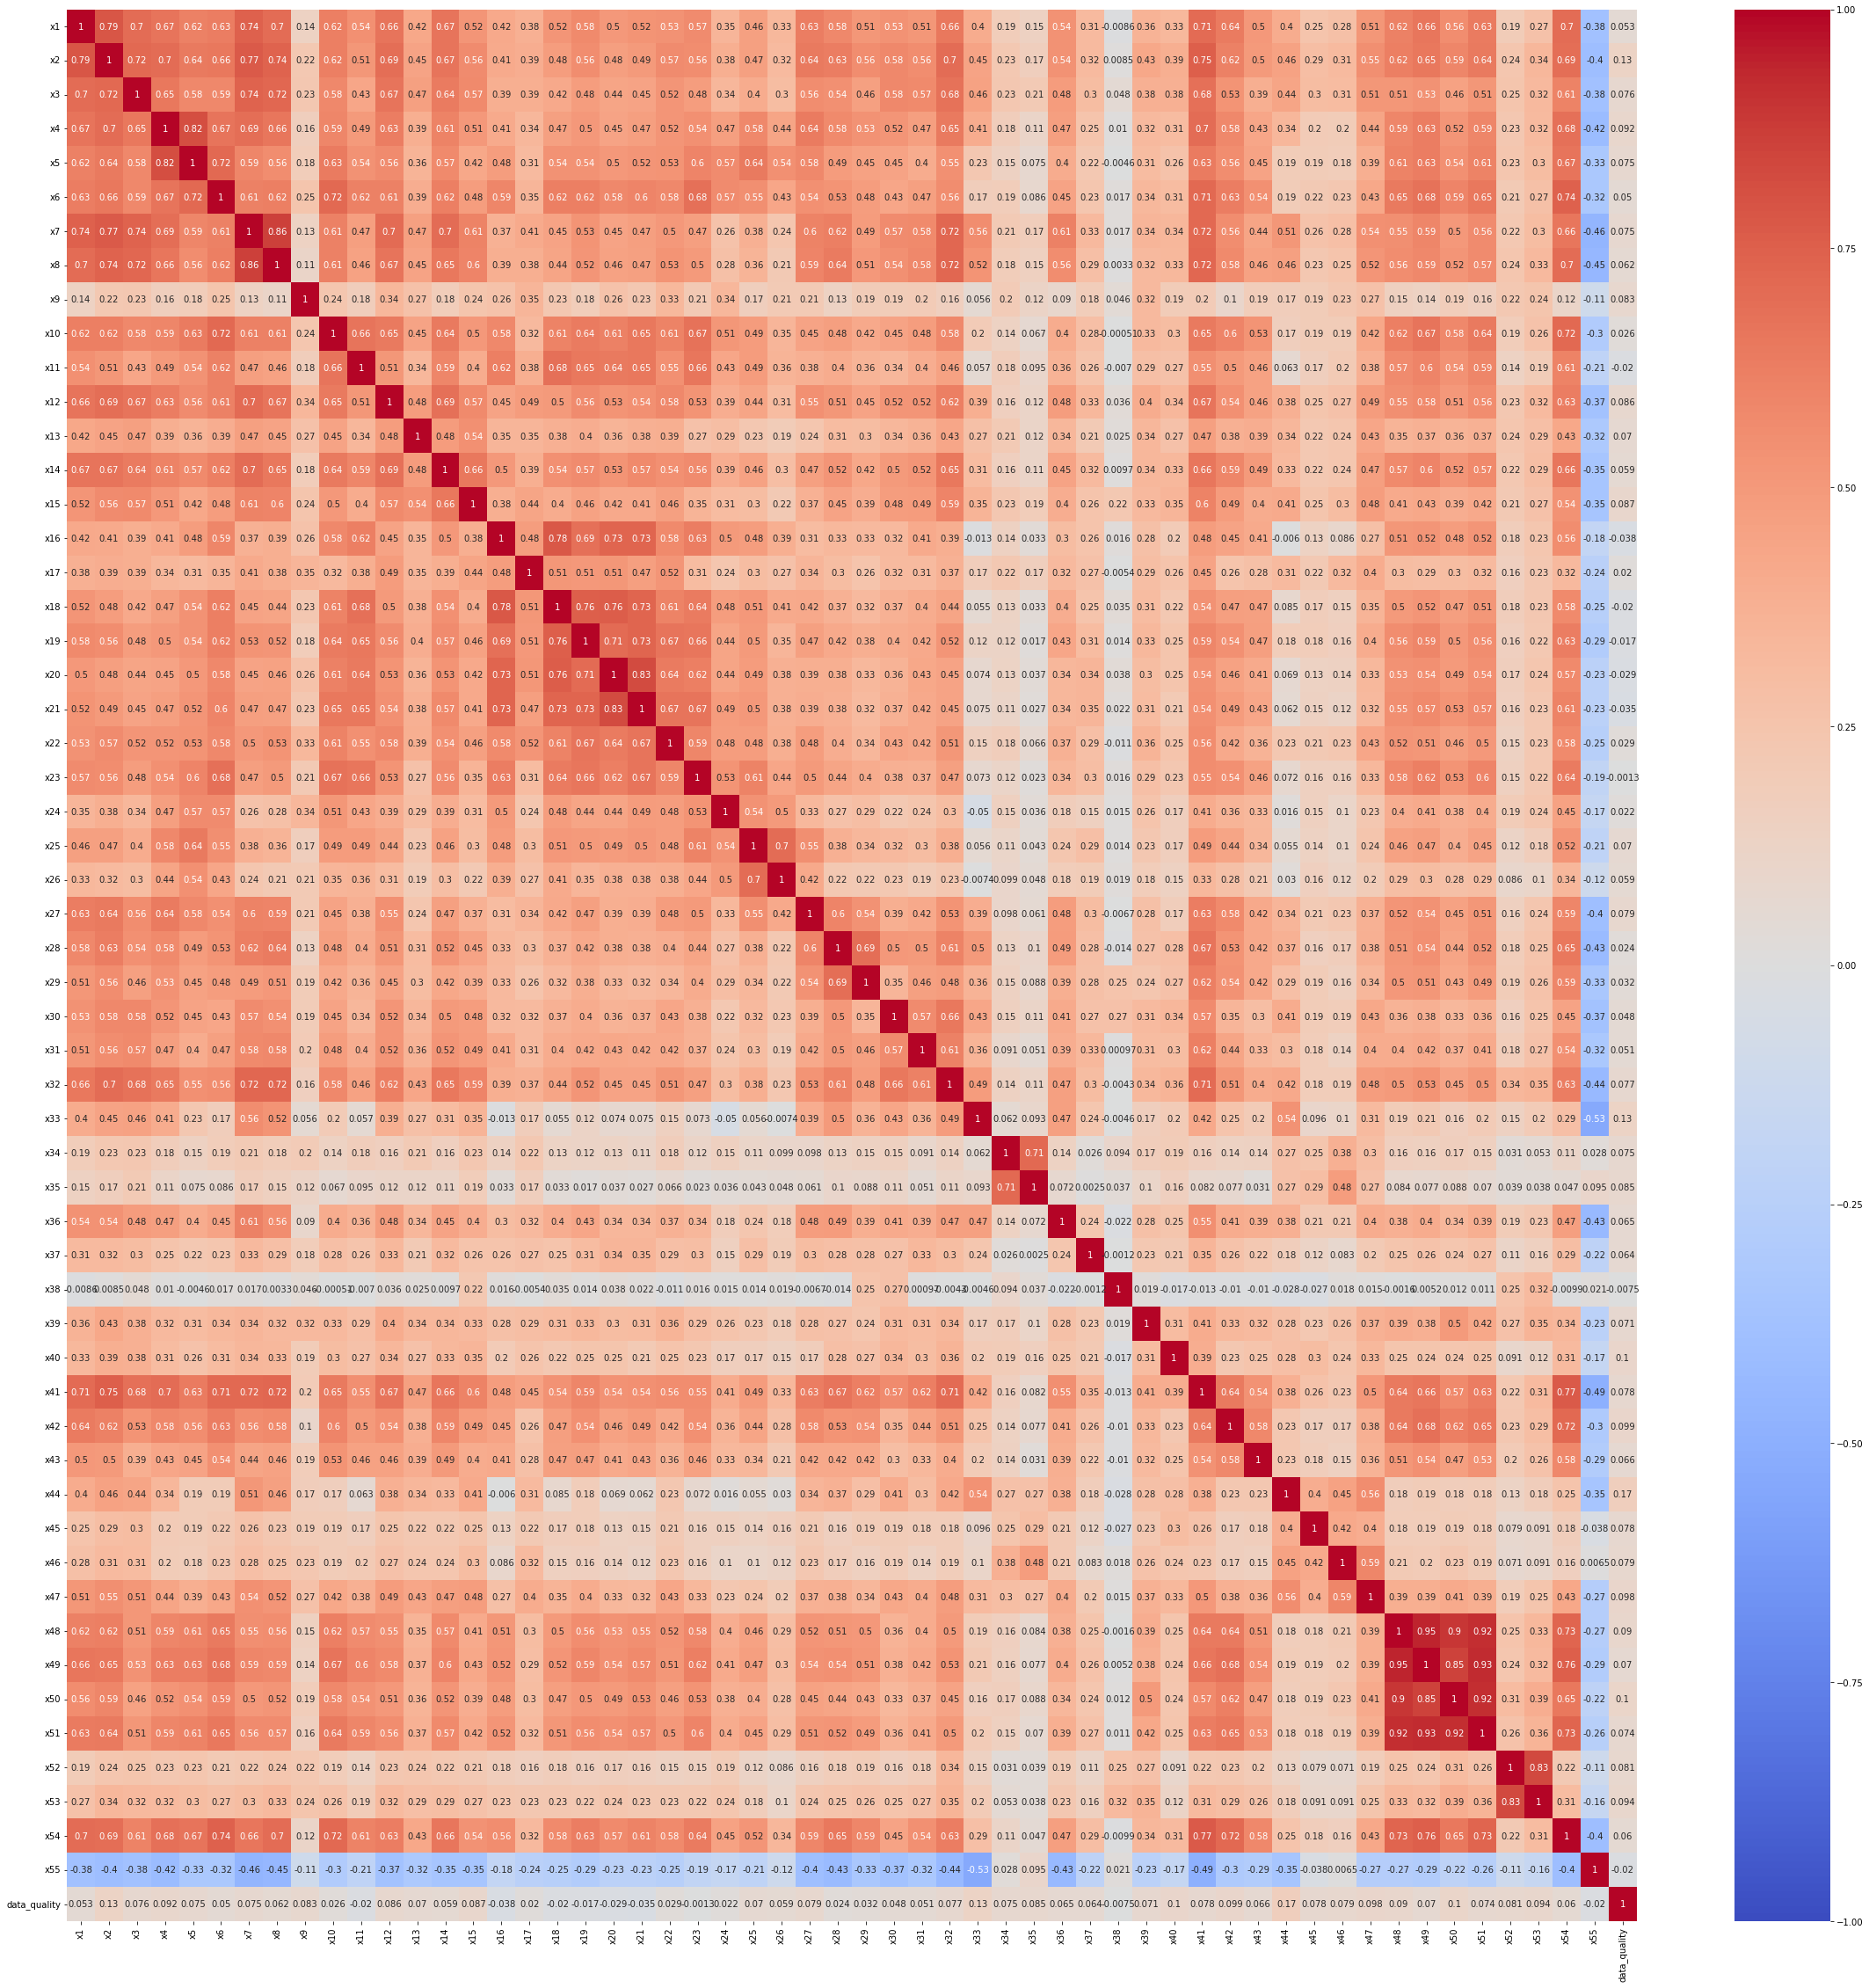

In [13]:
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax=1, cmap='coolwarm');

In [8]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
columnas_fuera = ['x4', 'x5', 'x7', 'x8', 'x10', 'x13', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x30', 'x32', 'x34', 'x35', 'x40', 'x44', 'x45', 'x46', 'x47']

In [ ]:
df.drop(columns= columnas_fuera, inplace=True)

In [ ]:
dicc_names= {'city':'city',
'country':'country',
'x1':'Meal_Inexpensive_Restaurant',
'x2':'Mealfor2_Midrange_Restaurant',
'x3':'McMeal_at_McDonalds',
'x6':'Cappuccino',
'x9':'Milk',
'x11':'Rice',
'x12':'Eggs_12uds',
'x14':'Chicken_Fillets',
'x15':'Beef_Round',
'x23':'Water_market',
'x24':'Wine_market',
'x25':'Domestic_Beer',
'x26':'Imported_Beer',
'x27':'Cigarettes_Marlboro',
'x28':'One_way_TicketTransport',
'x29':'Monthly_Pass_Regular_Price',
'x31':'Taxi',
'x33':'Gasoline',
'x36':'Basic',
'x37':'Prepaid_Mobile',
'x38':'Internet',
'x39':'Gym_Monthly',
'x41':'Cinema',
'x42':'Preschool_Monthly',
'x43':'Primary_School_Yearly',
'x48':'Apt_1bed_inCentre',
'x49':'Apt_1bed_OutsideCentre',
'x50':'Apt_3beds_inCentre',
'x51':'Apt_3beds_OutsideCentre',
'x52':'Price_per_Square_Meter_inCentre',
'x53':'Price_per_Square_Meter_OutsideCentre',
'x54':'Average_Monthly_Net_Salary',
'x55':'Mortgage_Interest_Rate',
'data_quality':'data_quality'}

In [ ]:
df.rename(columns = dicc_names, inplace = True)

In [ ]:
df.stb.missing()

,missing,total,percent
Price_per_Square_Meter_OutsideCentre,2303,4956,46.468927
Price_per_Square_Meter_inCentre,2227,4956,44.935432
Monthly_Pass_Regular_Price,2166,4956,43.704600
Primary_School_Yearly,1681,4956,33.918483
Apt_3beds_OutsideCentre,1512,4956,30.508475
One_way_TicketTransport,1506,4956,30.387409
Apt_3beds_inCentre,1480,4956,29.862793
Average_Monthly_Net_Salary,1432,4956,28.894270
Apt_1bed_OutsideCentre,1431,4956,28.874092
Gym_Monthly,1375,4956,27.744149


In [ ]:
df.to_csv('coste_de_vida_final.csv')

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Nuestra variable dependiente es x36, (sobre los básicos como la electricidad, el agua en el hogar). Es un float con 9.85 nulos. Tener en cuenta la data_quality, falso integer

In [ ]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk,Rice,Eggs_12uds,Chicken_Fillets,Beef_Round,Water_market,Wine_market,Domestic_Beer,Imported_Beer,Cigarettes_Marlboro,One_way_TicketTransport,Monthly_Pass_Regular_Price,Taxi,Gasoline,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,data_quality
0,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1


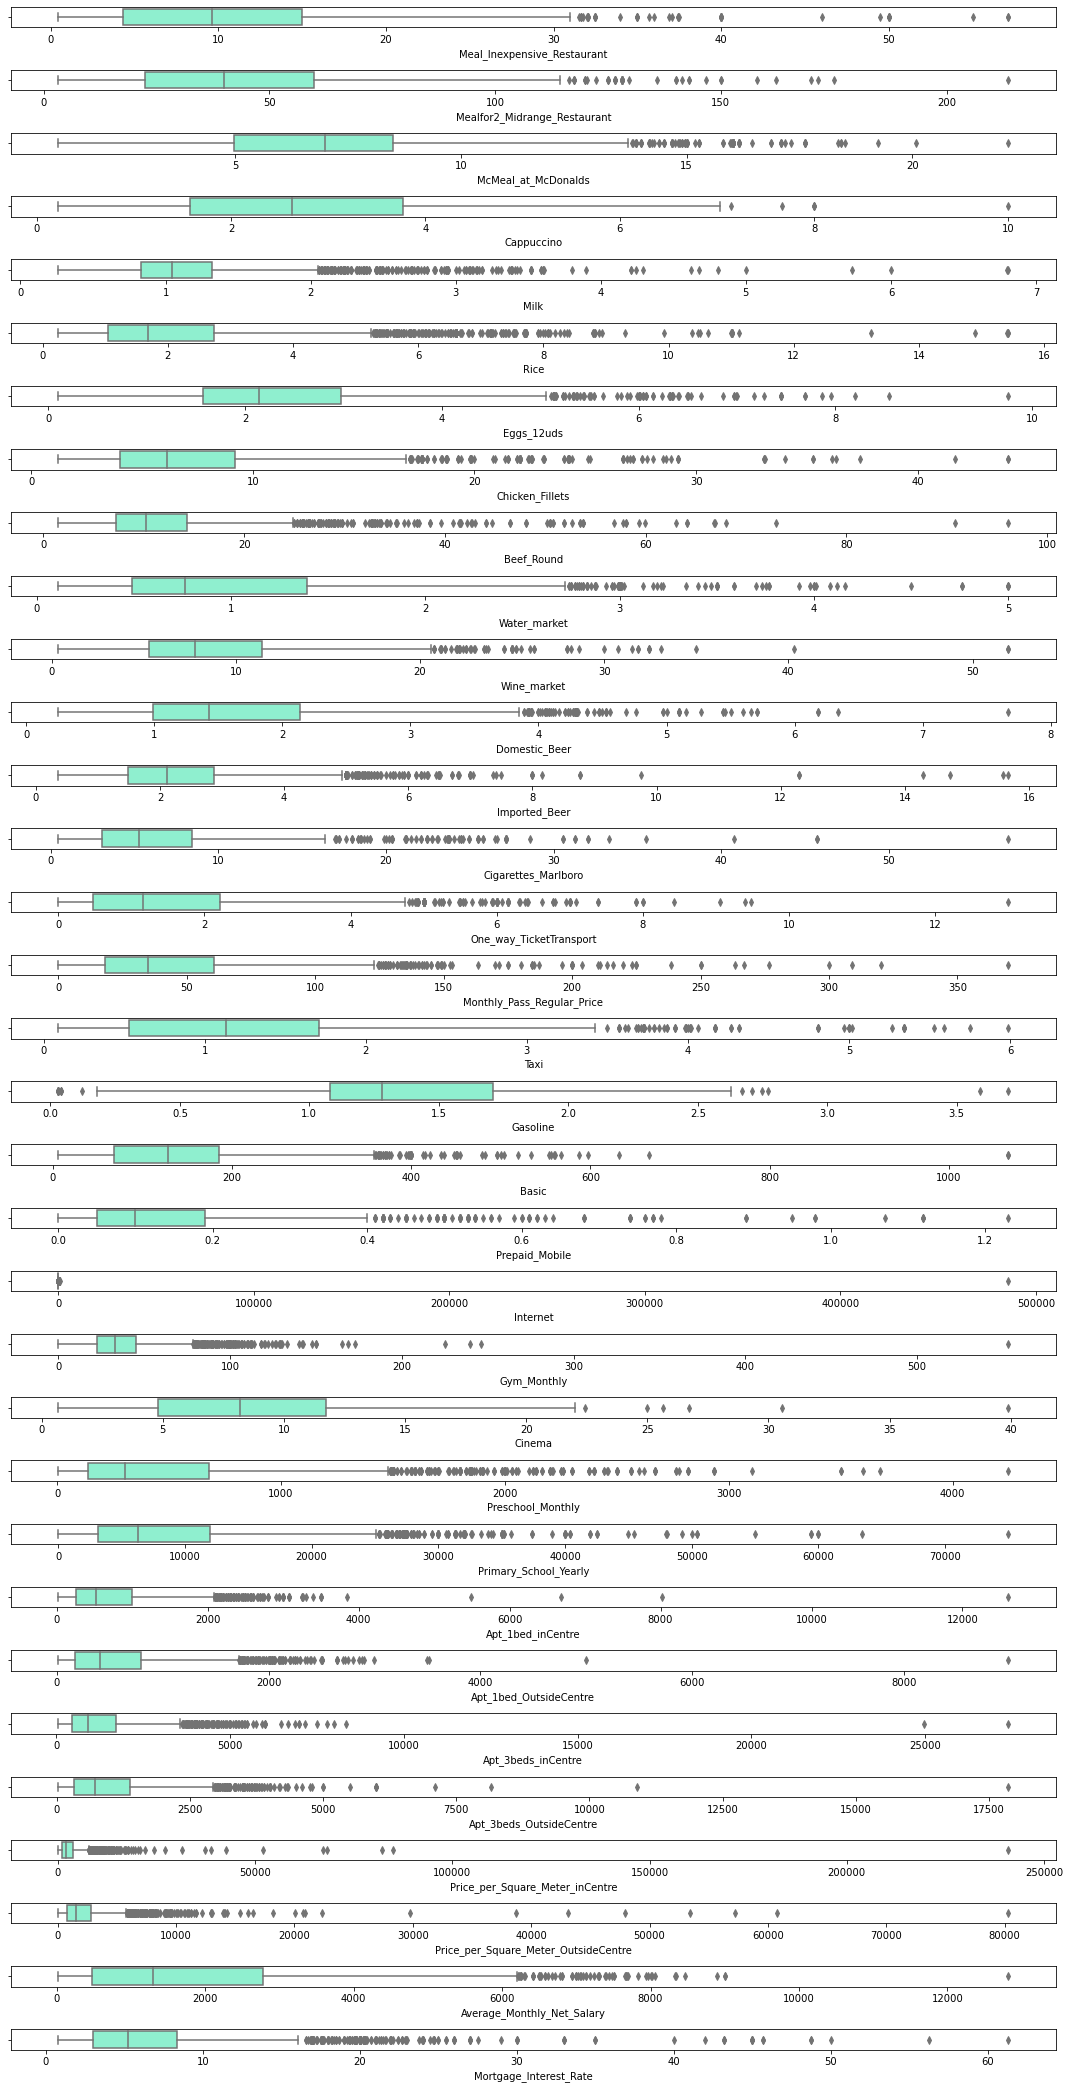

In [ ]:
fig, axes = plt.subplots(34, figsize=(15,30))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()

<AxesSubplot:xlabel='Cappuccino', ylabel='Count'>

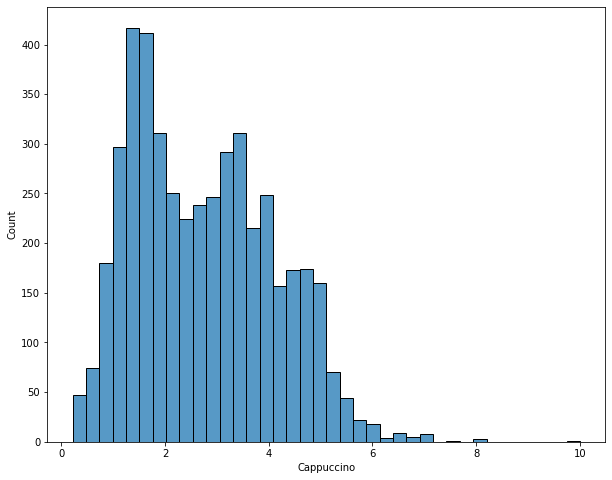

In [ ]:
sns.histplot(numericas['Cappuccino'])

In [ ]:
stats.shapiro(numericas['Cappuccino'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
# df['required_age'].fillna(df['required_age'].median ,inplace = True)
# numericas['cap_notnans'] = numericas['Cappuccino'].fillna(numericas['Cappuccino'].median())
# stats.shapiro(numericas['cap_notnans'])

In [ ]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
imputer.fit(numericas)

IterativeImputer()

In [ ]:
numericas_trans = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [ ]:
numericas_trans.head()

,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk,Rice,Eggs_12uds,Chicken_Fillets,Beef_Round,Water_market,Wine_market,Domestic_Beer,Imported_Beer,Cigarettes_Marlboro,One_way_TicketTransport,Monthly_Pass_Regular_Price,Taxi,Gasoline,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,data_quality
0,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1.0
1,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1.0
2,4.13,28.47,4.98,3.54,1.91,1.03,1.71,3.77,11.75,0.51,11.39,0.95,2.26,3.70,0.36,28.47,0.37,1.19,59.65,0.02,16.66,34.17,8.54,555.18,24556.21,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1.0
3,3.68,18.42,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.35,9.83,2.27,3.61,4.30,0.25,4.91,0.31,1.35,43.57,0.01,9.33,25.37,4.30,107.07,3682.67,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1.0
4,4.91,22.11,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.36,9.83,1.54,2.49,4.30,0.49,11.67,0.22,1.24,58.07,0.01,7.95,21.20,4.91,74.00,1964.24,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1.0


In [ ]:
numericas_trans.stb.missing().T

,Meal_Inexpensive_Restaurant,Apt_1bed_inCentre,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_OutsideCentre,Mealfor2_Midrange_Restaurant,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,Basic,Gasoline,Taxi,Monthly_Pass_Regular_Price,One_way_TicketTransport,Cigarettes_Marlboro,Imported_Beer,Domestic_Beer,Wine_market,Water_market,Beef_Round,Chicken_Fillets,Eggs_12uds,Rice,Milk,Cappuccino,McMeal_at_McDonalds,data_quality
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in numericas_trans.columns:
    if stats.shapiro(numericas_trans[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(numericas_trans[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(numericas_trans[col])[1]}')
    print('--------------------------------------------------------')

Meal_Inexpensive_Restaurant, NO tiene distribución normal -> 8.267660939516421e-44
--------------------------------------------------------
Mealfor2_Midrange_Restaurant, NO tiene distribución normal -> 1.0913603910242255e-37
--------------------------------------------------------
McMeal_at_McDonalds, NO tiene distribución normal -> 9.016443910280117e-34
--------------------------------------------------------
Cappuccino, NO tiene distribución normal -> 4.4814828749393086e-32
--------------------------------------------------------
Milk, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Rice, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Eggs_12uds, NO tiene distribución normal -> 2.0641126379504555e-41
--------------------------------------------------------
Chicken_Fillets, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Beef_Round, NO tiene distribuc

In [ ]:
stats.shapiro(numericas_trans['Imported_Beer'])

ShapiroResult(statistic=0.8686401844024658, pvalue=0.0)

<AxesSubplot:xlabel='Imported_Beer', ylabel='Count'>

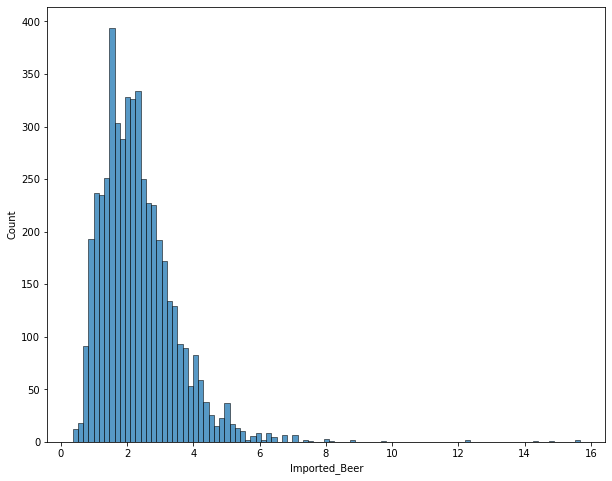

In [ ]:
sns.histplot(numericas_trans['Imported_Beer'])

In [ ]:
stats.shapiro(numericas_trans['Wine_market'])

ShapiroResult(statistic=0.9235901236534119, pvalue=1.2611686178923354e-44)

<AxesSubplot:xlabel='Wine_market', ylabel='Count'>

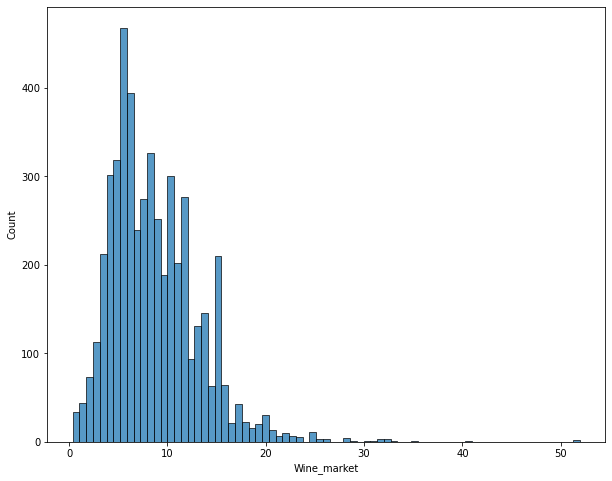

In [ ]:
sns.histplot(numericas_trans['Wine_market'])

In [ ]:
categoricas = df.select_dtypes(include = 'object')

In [ ]:
categoricas = categoricas.reset_index()
categoricas.head(2)

,index,city,country
0,0,Seoul,South Korea
1,1,Shanghai,China


In [ ]:
numericas_trans = numericas_trans.reset_index()
numericas.head(2)

,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk,Rice,Eggs_12uds,Chicken_Fillets,Beef_Round,Water_market,Wine_market,Domestic_Beer,Imported_Beer,Cigarettes_Marlboro,One_way_TicketTransport,Monthly_Pass_Regular_Price,Taxi,Gasoline,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,data_quality
0,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1


In [ ]:
df_final = categoricas.merge(numericas_trans, how='inner', left_on='index', right_on='index')

In [ ]:
df_final.stb.missing().T

,index,Taxi,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,Gasoline,Monthly_Pass_Regular_Price,city,One_way_TicketTransport,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk,Rice,Eggs_12uds,Chicken_Fillets,Beef_Round,Water_market,Wine_market,Domestic_Beer,Imported_Beer,Cigarettes_Marlboro,data_quality
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.shape

(4956, 37)

In [ ]:
df_final.drop('index', inplace=True, axis=1)

In [ ]:
# guardamos los datos sin nulos, con las columnas filtradas los nombres cambiados para facilitar el análisis
df_final.to_csv('../archivos/coste_vida_limpio.csv')

In [ ]:
num_final = df_final.select_dtypes(include=np.number)
for col in num_final.columns:
    if stats.shapiro(num_final[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(num_final[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(num_final[col])[1]}')
    print('--------------------------------------------------------')

Meal_Inexpensive_Restaurant, NO tiene distribución normal -> 8.267660939516421e-44
--------------------------------------------------------
Mealfor2_Midrange_Restaurant, NO tiene distribución normal -> 1.0913603910242255e-37
--------------------------------------------------------
McMeal_at_McDonalds, NO tiene distribución normal -> 9.016443910280117e-34
--------------------------------------------------------
Cappuccino, NO tiene distribución normal -> 4.4814828749393086e-32
--------------------------------------------------------
Milk, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Rice, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Eggs_12uds, NO tiene distribución normal -> 2.0641126379504555e-41
--------------------------------------------------------
Chicken_Fillets, NO tiene distribución normal -> 0.0
--------------------------------------------------------
Beef_Round, NO tiene distribuc

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [ ]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, numericas)

In [ ]:
ind.keys()

dict_keys(['Meal_Inexpensive_Restaurant', 'Mealfor2_Midrange_Restaurant', 'McMeal_at_McDonalds', 'Cappuccino', 'Milk', 'Rice', 'Eggs_12uds', 'Chicken_Fillets', 'Beef_Round', 'Water_market', 'Wine_market', 'Domestic_Beer', 'Imported_Beer', 'Cigarettes_Marlboro', 'One_way_TicketTransport', 'Monthly_Pass_Regular_Price', 'Taxi', 'Gasoline', 'Basic', 'Prepaid_Mobile', 'Internet', 'Gym_Monthly', 'Cinema', 'Preschool_Monthly', 'Primary_School_Yearly', 'Apt_1bed_inCentre', 'Apt_1bed_OutsideCentre', 'Apt_3beds_inCentre', 'Apt_3beds_OutsideCentre', 'Price_per_Square_Meter_inCentre', 'Price_per_Square_Meter_OutsideCentre', 'Average_Monthly_Net_Salary', 'Mortgage_Interest_Rate', 'data_quality'])

In [ ]:
df_index = df_final.reset_index()

In [ ]:
df_index[df_index['index'].isin(ind['Average_Monthly_Net_Salary'])]

,index,city,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk,Rice,Eggs_12uds,Chicken_Fillets,Beef_Round,Water_market,Wine_market,Domestic_Beer,Imported_Beer,Cigarettes_Marlboro,One_way_TicketTransport,Monthly_Pass_Regular_Price,Taxi,Gasoline,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate,data_quality
142,142,Seattle,United States,20.000000,100.000000,11.000000,5.210000,1.120000,5.000000,3.530000,14.780000,17.450000,1.940000,15.000000,3.210000,3.240000,10.990000,2.750000,100.000000,1.680000,1.400000,221.73,0.130000,71.00,57.490000,15.000000,1489.170000,27142.860000,2291.820000,1843.860000,4174.860000,3055.840000,6897.610000,4878.430000,6292.34,5.230000,1.0
272,272,San Jose,United States,19.000000,80.000000,9.040000,5.170000,1.350000,4.420000,4.560000,11.430000,16.700000,1.670000,15.000000,2.610000,2.470000,11.000000,2.500000,90.000000,1.860000,1.610000,200.44,0.190000,74.12,69.500000,15.000000,1987.500000,28033.330000,2469.600000,2154.450000,4283.330000,3758.330000,11763.420000,8137.520000,6808.52,5.220000,1.0
560,560,Vaduz,Liechtenstein,26.710000,106.850000,14.960000,5.160000,1.750000,2.140000,7.450000,10.350000,24.570000,1.020000,16.030000,2.070000,2.140000,9.620000,4.540000,53.420000,1.100000,1.760000,194.84,0.170000,54.13,74.790000,19.230000,240.400000,13077.830000,1522.050000,1238.910000,2510.690000,1981.660000,6228.000000,3472.460000,7241.72,7.120000,0.0
980,980,Zurich,Switzerland,26.710000,128.210000,16.030000,5.600000,1.780000,3.400000,6.040000,28.520000,51.870000,1.390000,13.890000,2.090000,2.830000,9.400000,4.700000,96.160000,5.340000,2.250000,250.12,0.300000,52.59,89.980000,21.370000,2935.690000,32131.210000,2072.520000,1618.110000,3958.910000,2925.480000,19152.850000,10938.320000,6782.99,1.440000,1.0
1321,1321,Irvine,United States,20.000000,100.000000,8.000000,5.000000,1.110000,5.700000,3.220000,10.280000,15.980000,1.500000,15.000000,3.090000,2.880000,9.690000,4.250000,112.500000,1.710000,1.680000,157.63,0.260000,68.60,41.670000,18.000000,1466.670000,27500.000000,2575.770000,2390.620000,4057.270000,3475.620000,7203.560000,7491.500000,6306.19,5.190000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,4698,Meilen,Switzerland,37.400000,128.210000,16.030000,5.340000,1.980000,4.270000,5.130000,41.670000,53.420000,0.800000,17.100000,1.600000,0.890000,9.620000,9.400000,133.560000,4.296445,1.970000,282.92,0.530000,85.48,106.850000,22.440000,2320.747882,37395.760000,2350.590000,2136.900000,4487.490000,4166.960000,20300.560000,18163.650000,6944.93,3.200000,0.0
4748,4748,Affoltern am Albis,Switzerland,36.315052,148.986919,19.860009,5.983357,1.920000,1.820000,7.690000,37.400000,64.110000,0.270000,16.030000,3.210000,3.761253,15.820547,4.270000,128.210000,5.340000,2.350000,320.54,0.337607,64.11,113.815110,26.710000,2671.130000,28674.512105,2564.280000,2030.060000,5342.250000,2777.970000,14762.474022,9997.200878,6410.70,0.900000,0.0
4818,4818,Lachen,Switzerland,26.710000,117.003523,14.788657,6.410000,2.845429,2.140000,8.550000,12.820000,30.276034,2.052378,20.378797,3.582559,4.229559,19.868229,3.210000,267.110000,3.559549,1.920000,106.85,0.343834,74.79,72.506701,22.773782,1985.915762,22282.253927,1602.680000,1282.140000,2671.130000,2136.900000,9291.850532,6788.979221,6410.70,0.240698,0.0
4859,4859,Mechanicsburg,United States,49.500000,79.990000,8.750000,4.330000,1.370000,3.520000,4.438536,17.610000,33.050000,1.990000,22.490000,3.365334,4.880000,8.000000,1.850000,49.000000,2.020000,1.422668,210.91,0.260000,65.00,20.000000,12.500000,1000.000000,17302.741888,1200.000000,800.000000,1800.000000,1200.000000,1851.390000,1851.390000,6527.9

# Test Estadísticos

1- ¿Qué diferencia existe el error de tipo I y el error de tipo II?


2- ¿Qué es la asimetría?

3- ¿Es vuestra variable respuesta asimétrica?


In [ ]:
df['Basic'].reset_index().T

0     1      2      3      4      5       6      7      8       9      
index    0.00   1.0   2.00   3.00   4.00   5.00    6.00   7.00   8.00    9.00  \
Basic  182.13  66.0  59.65  43.57  58.07  37.06  128.77  83.88  67.63  553.99   

        10     11     12     13     14     15     16     17      18      19     
index  10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00   18.00   19.00  \
Basic  79.55  66.56  26.53  69.27  48.85  28.27  31.81  55.64  145.92  171.22   

        20      21     22     23     24     25     26     27      28     29     
index  20.00   21.00  22.00  23.00  24.00  25.00  26.00  27.00   28.00  29.00  \
Basic  98.89  180.61  68.88  48.19  24.93  92.43  33.92  36.49  299.36  40.46   

        30    31      32      33     34      35    36     37     38     39     
index  30.00  31.0   32.00   33.00  34.00   35.00  36.0  37.00  38.00  39.00  \
Basic  28.69  21.1  199.44  206.04  74.15  140.05  36.3  71.32  93.12  76.64   

        40     41     42     43     44     45      46     47     48     49     
index  40.00  41.00  42.00  43.00  44.00  45.00   46.00  47.00  48.00  49.00  \
Basic  67.77  76.64  52.99  30.78  45.79  67.77  163.78  74.36  45.92  42.69   

        50     51     52     53     54     55     56     57     58     59     
index  50.00  51.00  52.00  53.00  54.00  55.00  56.00  57.00  58.00  59.00  \
Basic  39.47  25.46  49.82  40.46  92.53  53.62  56.41  67.58  53.07  89.91   

        60     61      62     63     64     65      66     67     68    69     
index  60.00  61.00   62.00  63.00  64.00  65.00   66.00  67.00  68.00  69.0  \
Basic  42.81  67.77  199.78  92.87  38.07  59.83  138.18  48.49  35.59  48.9   

        70     71     72     73      74     75     76     77      78    79     
index  70.00  71.00  72.00  73.00   74.00  75.00  76.00  77.00   78.00  79.0  \
Basic  92.83  39.99  92.53  38.07  156.11  45.79  37.01  47.45  123.31  34.2   

         80     81     82     83    84     85     86      87     88     89     
index   80.00  81.00  82.00  83.00  84.0  85.00  86.00   87.00  88.00  89.00  \
Basic  166.08  41.59  34.17  32.39   NaN  31.79  45.92  170.42  41.97  63.46   

        90     91      92    93     94     95     96      97      98     99     
index  90.00  91.00   92.00  93.0  94.00  95.00  96.00   97.00   98.00  99.00  \
Basic  39.99  84.52  166.22   NaN  28.18  43.29  71.18  173.45  213.22  53.86   

         100     101     102     103    104    105     106     107     108    
index  100.00  101.00  102.00  103.00  104.0  105.0  106.00  107.00  108.00  \
Basic   34.17   64.83  127.96  145.68    NaN   34.2  159.71   75.63  131.53   

         109     110     111     112     113     114     115    116     117    
index  109.00  110.00  111.00  112.00  113.00  114.00  115.00  116.0  117.00  \
Basic   49.32   38.09   21.56   70.83   42.71   37.01   35.59  185.0  133.25   

        118     119     120     121     122     123     124     125     126    
index  118.0  119.00  120.00  121.00  122.00  123.00  124.00  125.00  126.00  \
Basic   72.6   89.91  170.85   71.18  148.65   49.32   37.98   36.92   21.35   

         127    128     129     130     131     132     133     134    135    
index  127.00  128.0  129.00  130.00  131.00  132.00  133.00  134.00  135.0  \
Basic   56.94  106.1   21.35   37.98   31.99  209.47   49.32   75.22    NaN   

         136     137    138     139     140     141     142     143    144    
index  136.00  137.00  138.0  139.00  140.00  141.00  142.00  143.00  144.0  \
Basic   13.51   56.41   43.6   56.94  181.61   49.82  221.73  104.88  308.3   

         145     146     147     148     149     150     151     152     153    
index  145.00  146.00  147.00  148.00  149.00  150.00  151.00  152.00  153.00  \
Basic   46.76   67.77   48.36  141.08   37.97  280.06   80.09   52.99   47.83   

         154     155     156     157     158     159     160     161     162    
index  154.00  155.00  156.00  157.00  158.00  159.00  160.00  161.00

4- ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [ ]:
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstestgit 

ImportError: cannot import name 'kstestgit' from 'scipy.stats' (/home/paloma/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py)

In [ ]:
kurtosistest(numericas_trans['Basic'])

5- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [ ]:
sm.qqplot(numericas_trans['Basic'], line ='45');